In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
NFFT = 2048 # Количество точек БПФ

## Банки фильтров
Последним шагом к вычислению банков фильтров является применение треугольных фильтров, обычно 40 фильтров, по шкале Мела, к спектру мощности для выделения частотных диапазонов. Шкала Мела направлена на то, чтобы имитировать нелинейное восприятие звука человеческим ухом, будучи более различимой на более низких частотах и менее различимой на более высоких частотах. Мы можем конвертировать между Герцами (f) и Mel (m), используя следующие уравнения:
$$m = 2595 \log_{10} \left(1+\frac{f}{700}\right), \quad\quad\quad(4)$$
$$f = 700 \left(10^{\frac{m}{2595}}-1\right).\quad\quad\quad(5)$$

Каждый фильтр в банке фильтров имеет треугольную форму с откликом 1 на центральной частоте и линейно уменьшается к 0, пока не достигнет центральных частот двух соседних фильтров, где отклик равен 0. Это можно смоделировать с помощью следующего уравнения: 
$$
H_m (k)=
\begin{cases}
   0, &\text{ $k<f(m-1)$},\\
   \frac{k-f(m-1)}{f(m)-f(m-1)}, &\text{ $f(m-1) \leq k < f(m)$},\\
   \frac{f(m+1)-k}{f(m+1)-f(m)}, &\text{ $f(m) \leq k \leq f(m+1)$},\\
   0, &\text{ $k > f(m+1)$}.
 \end{cases}
\quad\quad\quad(6)
$$
$f$ - список из $M+2$ меловых частот. 

In [6]:
nfilt = 40
low_freq_mel = (2595 * np.log10(1 + (44100 / 2048) / 700))
high_freq_mel = (2595 * np.log10(1 + (44100 / 2) / 700))  # Конвертирование Гц в Мел
mel_points = np.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Точки, равномерно расположенные по мел-шкале
hz_points = (700 * (10**(mel_points / 2595) - 1))  # Конвертирование Мел в Гц
print(mel_points)
print(hz_points)
# У нас нет разрешения по частоте, необходимого для установки фильтров в точных точках, рассчитанных выше, 
# поэтому нам нужно округлить эти частоты до ближайшего бина БПФ. Этот процесс не влияет на точность признаков. 
# Чтобы преобразовать частоты в числа бинов БПФ, нам нужно знать размер БПФ и частоту дискретизации.
bin = np.floor((NFFT + 1) * hz_points / 44100)
print(bin)

# Мы можем видеть, что окончательный банк фильтров заканчивается на бине 1024, 
# что соответствует 10 кГц с размером БПФ в 2048 точек.

 
fbank = np.zeros((nfilt, int(np.floor(NFFT / 2 + 1))))

for m in range(1, nfilt + 1):
    f_m_minus = int(bin[m - 1])   # левая сторона
    f_m = int(bin[m])             # центр
    f_m_plus = int(bin[m + 1])    # правая сторона
 
    for k in range(f_m_minus, f_m):
        fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
    for k in range(f_m, f_m_plus):
        fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])
fbank1 = [f[0] for f in fbank.T]

[  34.14573921  129.00407049  223.86240177  318.72073305  413.57906433
  508.43739561  603.29572689  698.15405817  793.01238946  887.87072074
  982.72905202 1077.5873833  1172.44571458 1267.30404586 1362.16237714
 1457.02070843 1551.87903971 1646.73737099 1741.59570227 1836.45403355
 1931.31236483 2026.17069611 2121.02902739 2215.88735868 2310.74568996
 2405.60402124 2500.46235252 2595.3206838  2690.17901508 2785.03734636
 2879.89567765 2974.75400893 3069.61234021 3164.47067149 3259.32900277
 3354.18733405 3449.04566533 3543.90399661 3638.7623279  3733.62065918
 3828.47899046 3923.33732174]
[2.15332031e+01 8.48932447e+01 1.53817126e+02 2.28793424e+02
 3.10353620e+02 3.99075868e+02 4.95589088e+02 6.00577429e+02
 7.14785118e+02 8.39021735e+02 9.74167949e+02 1.12118177e+03
 1.28110532e+03 1.45507225e+03 1.64431575e+03 1.85017729e+03
 2.07411618e+03 2.31771982e+03 2.58271504e+03 2.87098031e+03
 3.18455903e+03 3.52567407e+03 3.89674345e+03 4.30039758e+03
 4.73949782e+03 5.21715679e+03 5.736

Text(0.5, 1.0, 'The full filterbank')

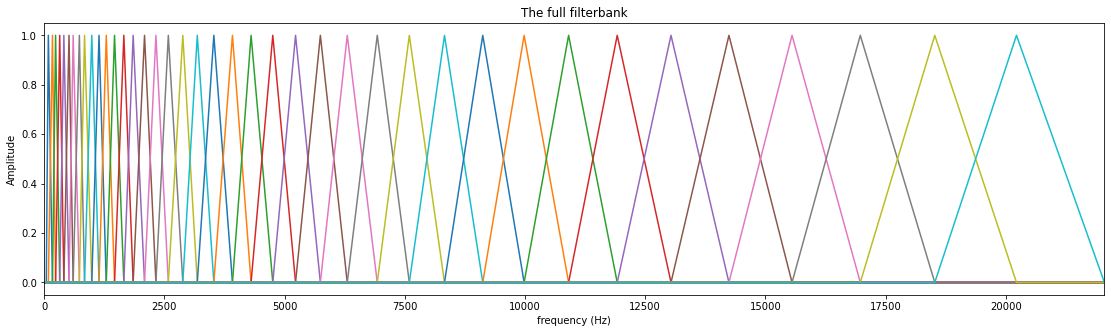

In [6]:
fig, ax = plt.subplots(1, figsize=(19, 5))
freq = np.linspace(44100/2048,44100/2,int(np.floor(NFFT / 2 + 1)))
ax.plot(freq, fbank.T)
ax.set_xlim([0, 44100/2])
plt.xlabel('frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('The full filterbank')

In [7]:
with open('filters.npy', 'wb') as f:
    np.save(f, fbank)

_________________________

In [16]:
NFFT = 11025 # Количество точек БПФ

In [17]:
low_freq = 440 * (2**(1/12))**(-36)
high_freq = 440 * (2**(1/12))**48            
low_freq_mel = (2595 * np.log10(1 + low_freq / 700))
high_freq_mel = (2595 * np.log10(1 + high_freq / 700))  # Конвертирование Гц в Мел
hz_points = np.array([440 * (2**(1/12))**n for n in range(-36,49)])
mel_points = (2595 * np.log10(1 + hz_points) / 700)  # Конвертирование Гц в Мел
print(mel_points)
print(hz_points)
# У нас нет разрешения по частоте, необходимого для установки фильтров в точных точках, рассчитанных выше, 
# поэтому нам нужно округлить эти частоты до ближайшего бина БПФ. Этот процесс не влияет на точность признаков. 
# Чтобы преобразовать частоты в числа бинов БПФ, нам нужно знать размер БПФ и частоту дискретизации.
b = np.floor((NFFT + 1) * hz_points / 44100)
print(b)
print(len(b))

[ 6.48078276  6.57216511  6.66363659  6.75519234  6.84682779  6.93853859
  7.03032062  7.12216999  7.214083    7.30605618  7.3980862   7.49016995
  7.58230447  7.67448696  7.76671477  7.85898541  7.9512965   8.0436458
  8.13603121  8.22845071  8.32090243  8.41338456  8.50589543  8.59843344
  8.69099707  8.78358491  8.8761956   8.96882788  9.06148054  9.15415244
  9.24684252  9.33954976  9.4322732   9.52501193  9.61776511  9.71053193
  9.80331163  9.89610348  9.98890681 10.08172097 10.17454537 10.26737942
 10.36022258 10.45307436 10.54593426 10.63880183 10.73167665 10.8245583
 10.9174464  11.0103406  11.10324055 11.19614592 11.28905642 11.38197176
 11.47489166 11.56781588 11.66074416 11.75367629 11.84661204 11.93955121
 12.03249361 12.12543907 12.2183874  12.31133845 12.40429206 12.49724809
 12.59020641 12.68316689 12.7761294  12.86909384 12.96206008 13.05502804
 13.14799762 13.24096872 13.33394127 13.42691517 13.51989035 13.61286675
 13.70584429 13.79882291 13.89180254 13.98478314 14.0

In [18]:
nfilt = 83

 
fbank = np.zeros((nfilt, int(np.floor(NFFT / 2 + 1))))

for m in range(1, nfilt + 1):
    f_m_minus = int(b[m - 1])   # левая сторона
    f_m = int(b[m])             # центр
    f_m_plus = int(b[m + 1])    # правая сторона
 
    for k in range(f_m_minus, f_m):
        fbank[m - 1, k] = (k - b[m - 1]) / (b[m] - b[m - 1])
    for k in range(f_m, f_m_plus):
        fbank[m - 1, k] = (b[m + 1] - k) / (b[m + 1] - b[m])
fbank1 = [f[0] for f in fbank.T]

Text(0.5, 1.0, 'The full filterbank')

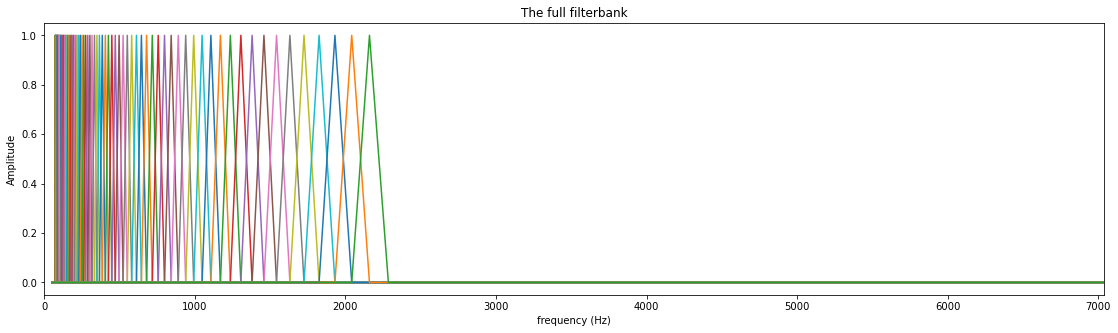

In [19]:
fig, ax = plt.subplots(1, figsize=(19, 5))
freq = np.linspace(low_freq ,high_freq,int(np.floor(NFFT / 2 + 1)))
ax.plot(freq, fbank.T)
ax.set_xlim([0, high_freq])
plt.xlabel('frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('The full filterbank')